In [ ]:
from google.colab import files
ukloaded = files.upload()

Saving lap1.csv to lap1.csv


In [ ]:

uploaded = files.upload()

Saving lap2.csv to lap2.csv


In [ ]:
from tensorflow import keras
from keras import layers
import io
import time
from keras.layers import GRU
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv(io.BytesIO(ukloaded['lap1.csv']))
data2=pd.read_csv(io.BytesIO(uploaded['lap2.csv']))

In [ ]:

v2vd=pd.concat([data1,data2],ignore_index=True)
nn=pd.DataFrame(v2vd.loc[13000:31000,[' Sender Speed(km/h)']])
from keras import metrics
m = keras.metrics.RootMeanSquaredError()
metrics1=[metrics.mae,metrics.mse,m]
metrics=metrics1
selected_features = [' Sender Speed(km/h)']

In [ ]:

dataset = nn[selected_features].values
# Scale the dataset between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data1 = dataset[:train_size]
test_data1 = dataset[train_size:]
train_data = scaler.fit_transform(train_data1)
test_data = scaler.transform(test_data1)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 15 # Length of input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
Adam=keras.optimizers.Adam(learning_rate=0.0005)
# Build the LSTM mode
# Compile and train the model
model = Sequential()
model.add(GRU(50,  return_sequences=True,  input_shape=(seq_length, len(selected_features))))
#bardashtane activation , 0.0005 lr
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(optimizer=Adam, loss=['mean_squared_error'],metrics=metrics1)
start = time.time()
history=model.fit(X_train, y_train, epochs=150, batch_size=32)
end = time.time()
total_time_GRU = end - start
print("Time for fitting GRU:  "+ str(total_time_GRU))
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

Epoch 1/150
450/450 [==============================] - 13s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0380 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1103
Epoch 2/150
450/450 [==============================] - 8s 18ms/step - loss: 1.9077e-04 - mean_absolute_error: 0.0019 - mean_squared_error: 1.9077e-04 - root_mean_squared_error: 0.0138
Epoch 3/150
450/450 [==============================] - 9s 20ms/step - loss: 1.7938e-04 - mean_absolute_error: 0.0021 - mean_squared_error: 1.7938e-04 - root_mean_squared_error: 0.0134
Epoch 4/150
450/450 [==============================] - 9s 20ms/step - loss: 1.6652e-04 - mean_absolute_error: 0.0020 - mean_squared_error: 1.6652e-04 - root_mean_squared_error: 0.0129
Epoch 5/150
450/450 [==============================] - 8s 18ms/step - loss: 1.5695e-04 - mean_absolute_error: 0.0023 - mean_squared_error: 1.5695e-04 - root_mean_squared_error: 0.0125
Epoch 6/150
450/450 [==============================] - 9s 20ms/step - loss: 1.4537e-04 

Text(0.5, 1.0, 'MAE for GRU')

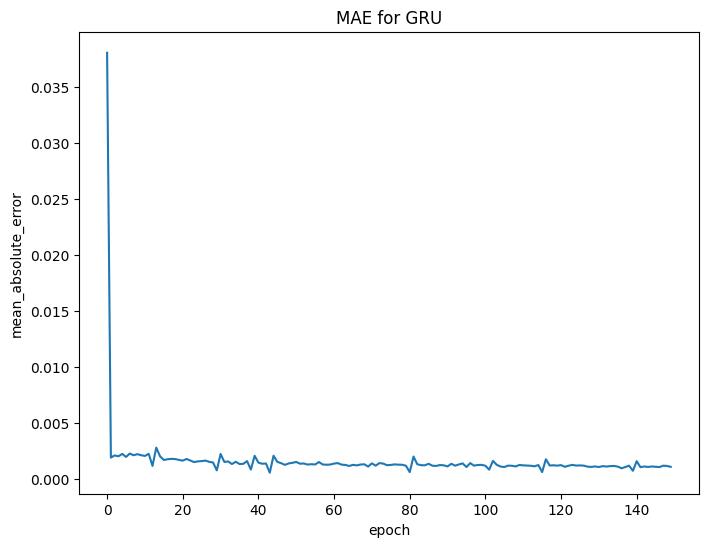

In [ ]:
import matplotlib.pyplot as plt
fig , ax =plt.subplots(figsize=(8,6))
ax.plot(history.history['mean_absolute_error'],label='mean_absolute_error')
plt.xlabel('epoch')
plt.ylabel('mean_absolute_error')
plt.title('MAE for GRU')

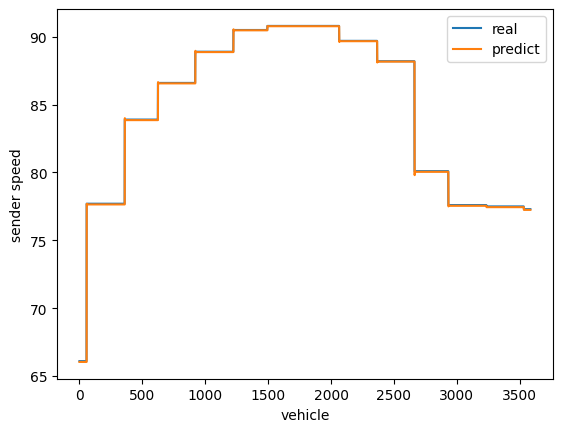

In [ ]:
close_predicted=scaler.inverse_transform(test_predictions).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.xlabel('vehicle')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)